# __Incremental Capstone - Week 6__

1. Load the dataset from https://www.kaggle.com/datasets/uciml/adult-census-income
2. Check for null values and ? in any columns and handle those values. Check the distribution of target variable income and identify if the dataset is balanced.
3. Perform below Univariate analysis
- Create a barplot for column income
- Create a distribution plot for column age
- Create a barplot for column education
- Create a barplot for Years of Education. Use column education.num
- Create a pie chart for Marital status. Use column marital.status
- Create a barplot for column sex
- Create a barplot for column Hours per week
4. Perform below Bivariate analysis
- Create a countplot of income across columns age, education, Marital Status, race, sex
- Draw a heatmap of data correlation and find out the columns to which income is highly correlated
5. Prepare the dataset for modeling
- Remove '?'
- Label encode all the categorical columns
- Prepare independent variables X and dependent variable Y (Income).
- Perform feature scaling using StandardScaler and fix the imbalance in the dataset using any one of the 1. techniques like SMOTE or RandomOverSampler
- Perform a train test split in the ratio 80:20 and random_state 42.
6. Perform Data Modeling
- Train Logistic Regression Model, KNN Classifier Model, SVM Classifier, Naive Bayes Classifier, Decision Tree Classifier and Random Forest Classifier
- Perform model evaluation on Accuracy and F1 score and identify the best model.

__1 - Load the dataset from https://www.kaggle.com/datasets/uciml/adult-census-income__

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
dataset = pd.read_csv('./data/adultcensusincome.csv')

In [3]:
# Preview dataset, target Income. Predict class either <= 50K or > 50K
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
dataset['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

__Remark: the character "?" is a missing value.__

In [5]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


__2 - Check for null values and ? in any columns and handle those values. Check the distribution of target variable income and identify if the dataset is balanced.__

In [6]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# No values in dataset are "?"
empty_data = dataset.isin([ '?' ]).sum ()
print(empty_data)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [8]:
missing_percent_workclass = 100 * empty_data['workclass']/len(dataset)
missing_percent_hours = 100 * empty_data['native.country']/len(dataset)
print(f"Missing workclass = {missing_percent_workclass:.2f}%", end = " ")
print(f"Missing native.country = {missing_percent_hours:.2f}%")

Missing workclass = 5.64% Missing native.country = 1.79%


In [9]:
# Checking the counts of target
income = dataset['income'].value_counts(normalize=True )
round(income * 100, 2).astype('str') + ' %'

income
<=50K    75.92 %
>50K     24.08 %
Name: proportion, dtype: object

<br>

Observations:
- The dataset doesn't have any null values, but it contains missing va lues in the form of '?' which needs to be preprocessed.
- The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 5Ok and 24.08% values have income more than 5Ok.

__3 - Perform below Univariate analysis__
- Create a histogram for column income
- Create a distribution plot for column age
- Create a barplot for column education
- Create a barplot for Years of Education. Use column education.num
- Create a pie chart for Marital status. Use column marital.status
- Create a barplot for column sex
- Create a barplot for column Hours per week

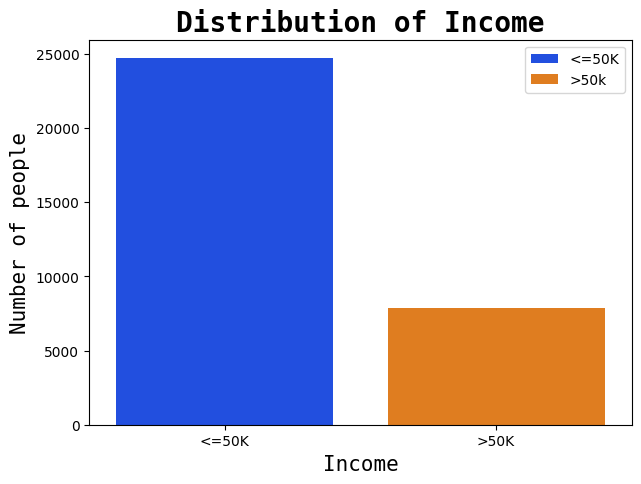

In [10]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()
#plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index,y=income.values,palette='bright', hue=["<=50K", ">50k"])
plt.title('Distribution of Income', fontdict ={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Income',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.show()

In [11]:
income.values

array([24720,  7841])

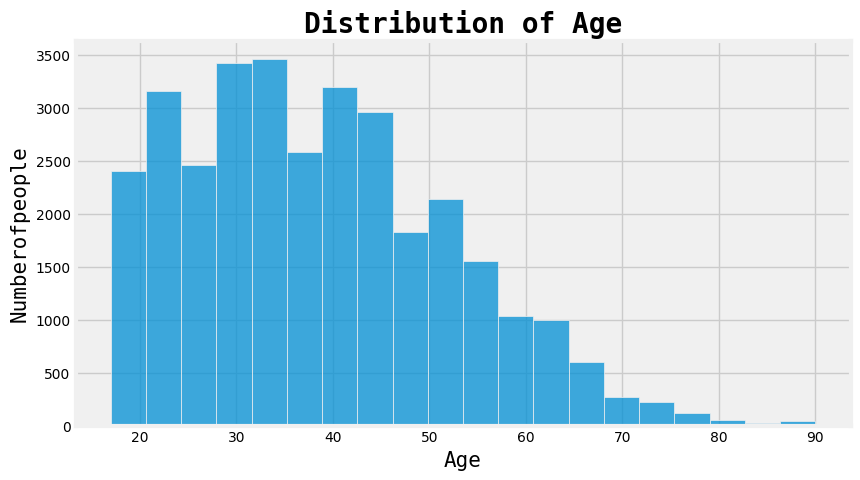

In [12]:
# Creating a distribution plot for 'Age'
age=dataset['age'].value_counts()
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.histplot(dataset['age'],bins=20)
plt.title('Distribution of Age',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Age',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.show()

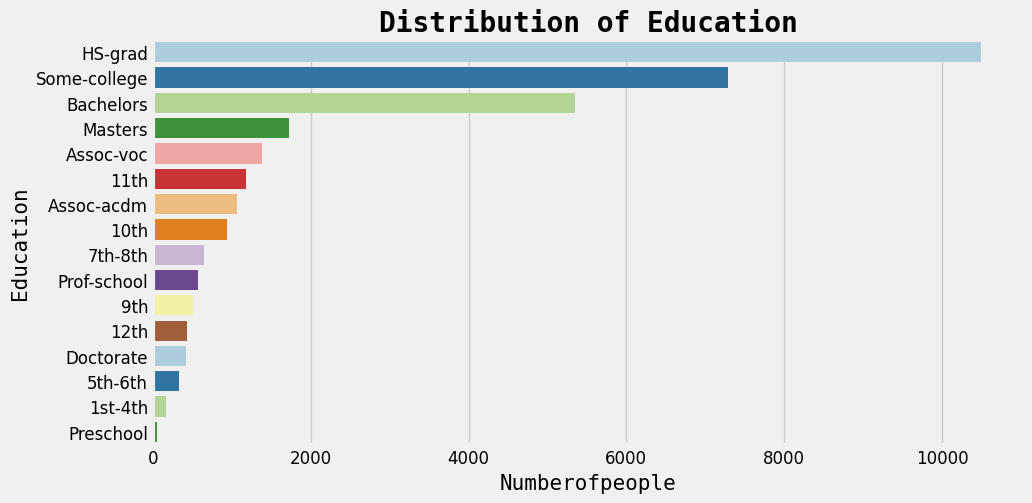

In [13]:
# Creating a barplot for 'Education'
edu=dataset['education'].value_counts()
#plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired', hue=edu.index)
plt.title('Distribution of Education',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Education',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.show()

Observation

- The bar plot shows most of the people are HS-grad
- Second largest count goes to Some-College and followed by Bachelors and Masters

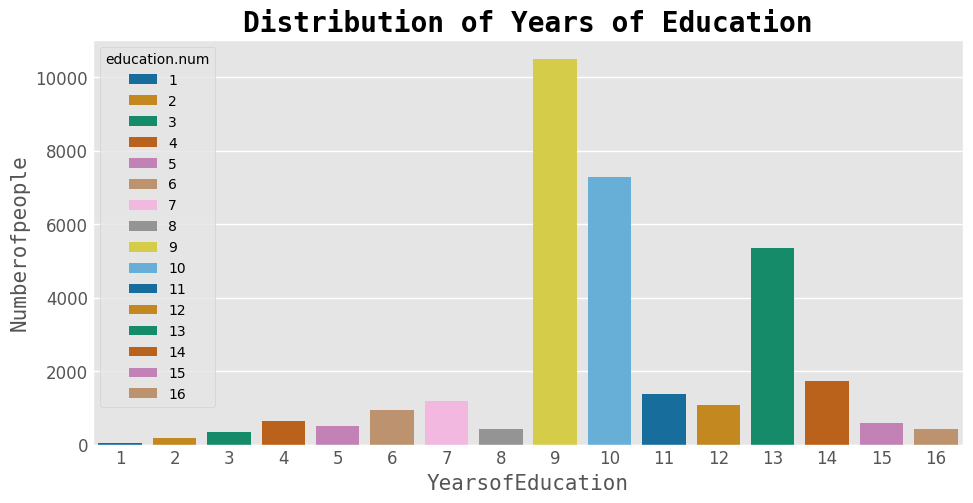

In [14]:
# Creating a barplot for 'Years of Education'
edu_num=dataset['education.num'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.barplot(x=edu_num.index,y=edu_num.values,palette='colorblind', hue=edu_num.index)
plt.title('Distribution of Years of Education',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('YearsofEducation',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.show()

Observation

- The bar plot shows that most of the people are with years of education 9
Years

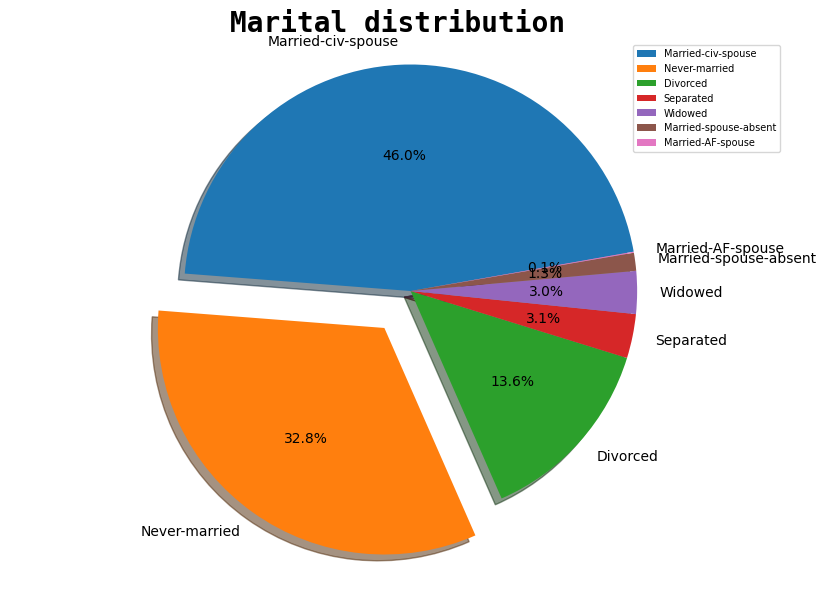

In [15]:
# Creating a pie chart for 'Marital status'
marital=dataset['marital.status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10,7))
plt.pie(marital.values,labels=marital.index,startangle=10,explode=(
0,0.20,0,0,0,0,0),shadow=True,autopct='%1.1f%%')
plt.title('Marital distribution',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.show()

Observation:

- The pie chart shows that 46% of the people are married
- The second largest set people are un married which counts to 32.8%

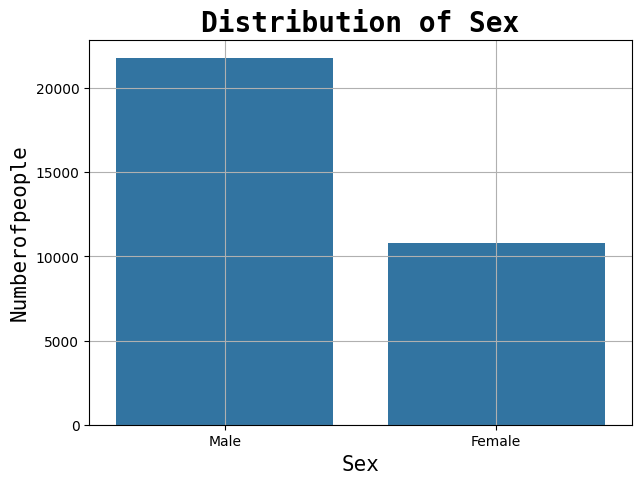

In [16]:
# Creating a barplot for 'Sex'
sex=dataset['sex'].value_counts()
plt.style.use('default')
plt.figure(figsize=(7,5))
sns.barplot(x=sex.index,y=sex.values)
plt.title('Distribution of Sex',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Sex',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

Observation:
- The bar plot shows that most of the people are male

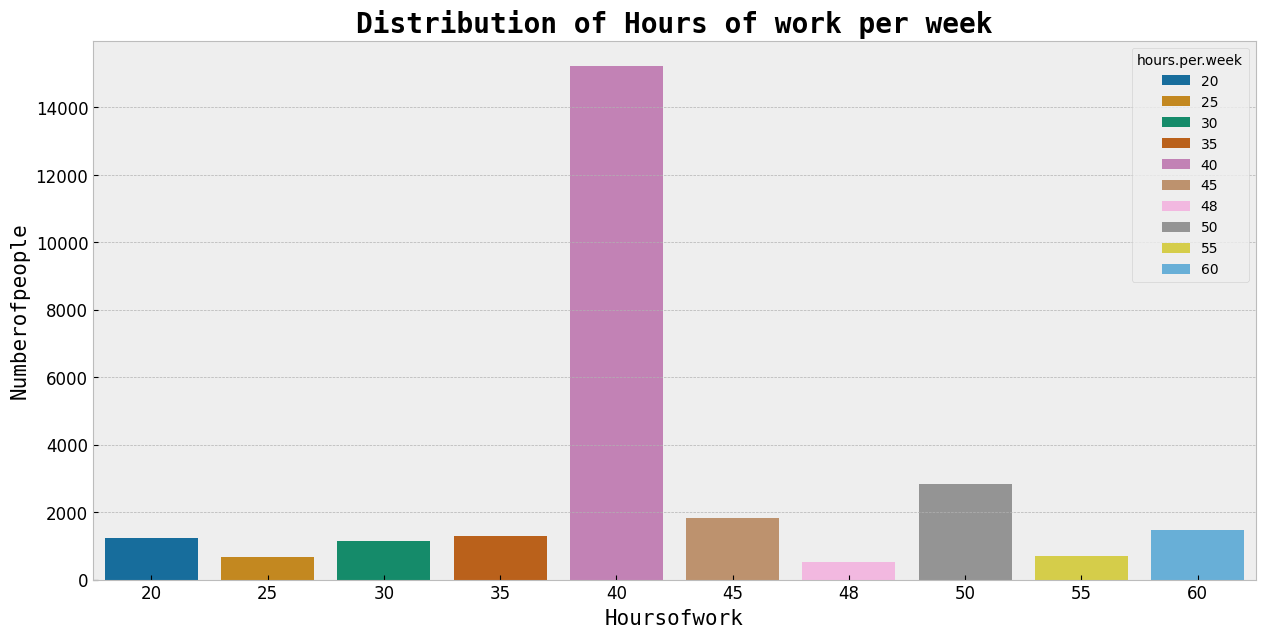

In [17]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)
plt.style.use('bmh')
plt.figure(figsize=(15,7))
sns.barplot(x=hours.index,y=hours.values,palette='colorblind', hue=hours.index)
plt.title('Distribution of Hours of work per week',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Hoursofwork',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.show()

Observation:
- The Hours of Work bar plot shows that most of the people are working for 40 hours in a week
- There are people who work for 60 hours a week too.

__4 - Perform below Bivariate analysis:__

- Create a countplot of income across columns age, education, Marital Status, race, sex
- Draw a heatmap of data correlation and find out the columns to which income is highly correlated

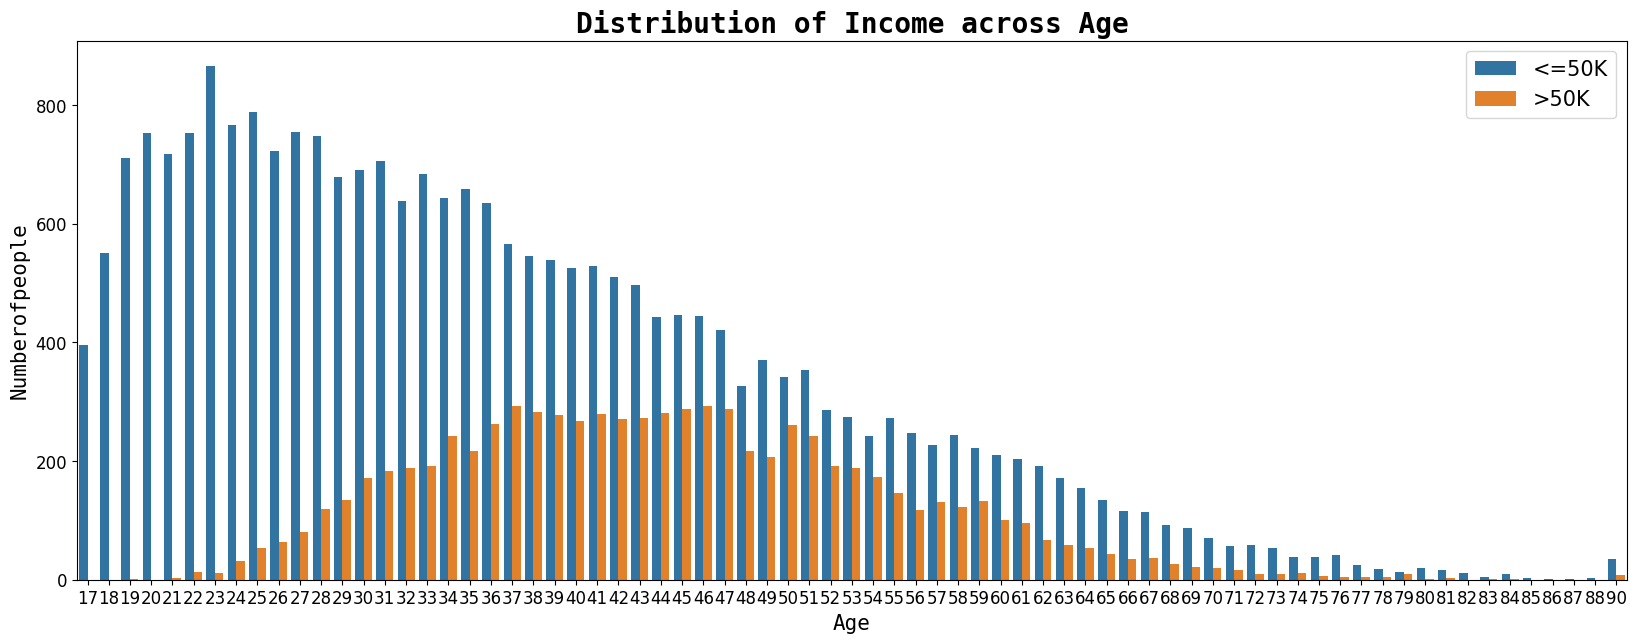

In [18]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20,7))
sns.countplot(dataset,x='age',hue = 'income')
plt.title('Distribution of Income across Age',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Age',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={'size':15})
plt.show()

Observation:
- The count plot of income versus age shows that most of the people of age
<30 are earning <=50k
- The people between the age of 30 and 65 are paid >50k

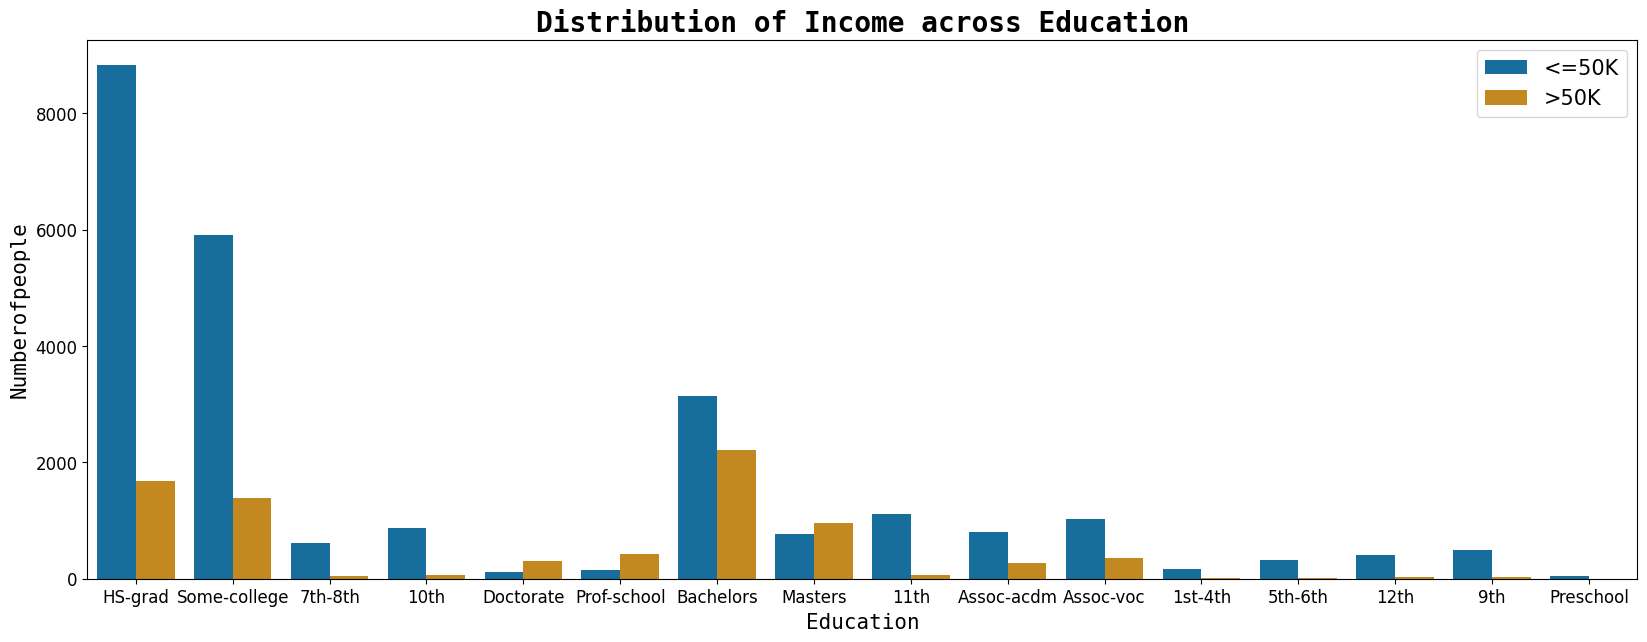

In [19]:
# Creating a countpLot of income across education
#plt.style.use('seaborn')
plt.figure(figsize=(20,7))
sns.countplot(dataset,x='education',hue='income',palette='colorblind')
plt.title('Distribution of Income across Education',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Education',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={'size':15})
plt.show()

Observation:
- The countplot of income across column education shows the various set of
people with different education and their salary level <=50k or >50k
- As we had seen earlier, most of the people have done education HS-grad
level

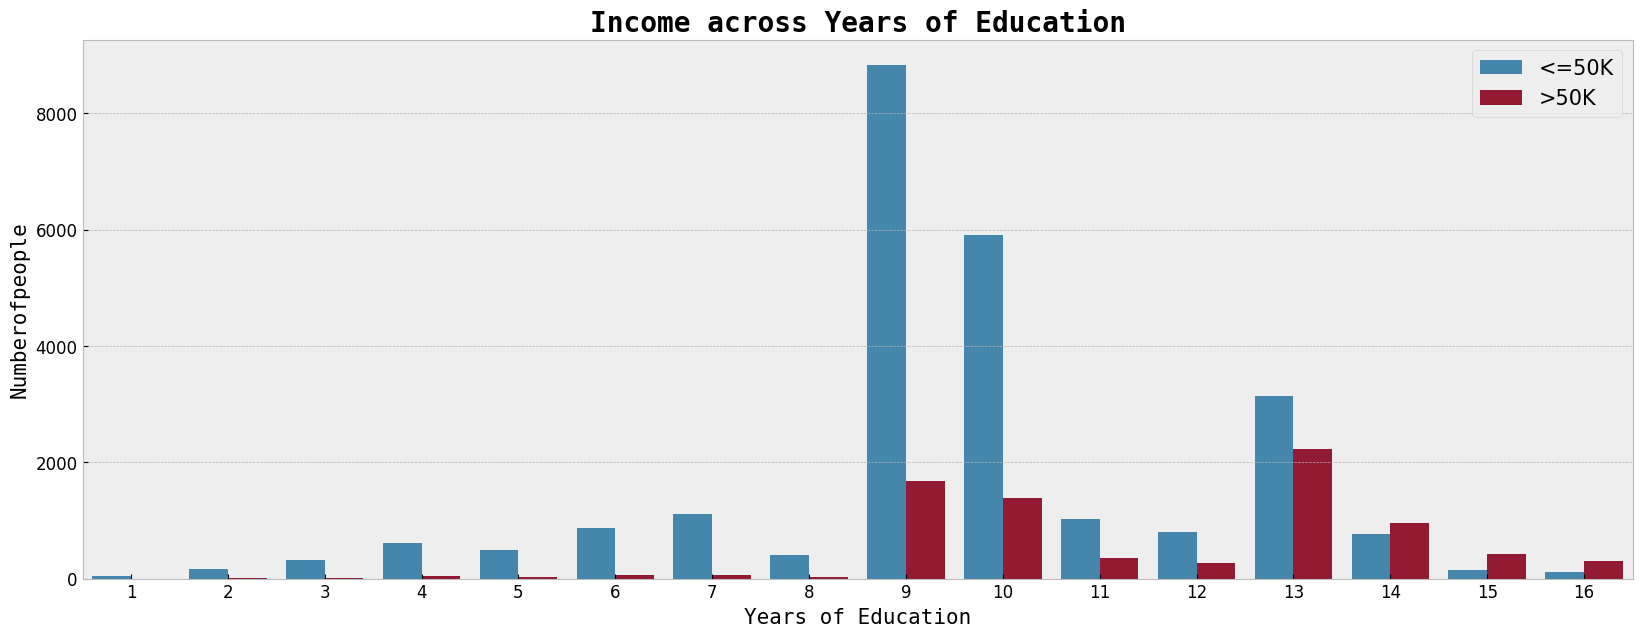

In [20]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20,7))
sns.countplot(dataset,x='education.num',hue='income')
plt.title('Income across Years of Education',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Years of Education',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={'size':15})
# plt.savefig('bi2.png')
plt.show()

Observation:
- The countplot of income across column years of education shows most of the people are with 9 years of education
- The plot also shows that most of the people who are paid >50k have done 13 years of education

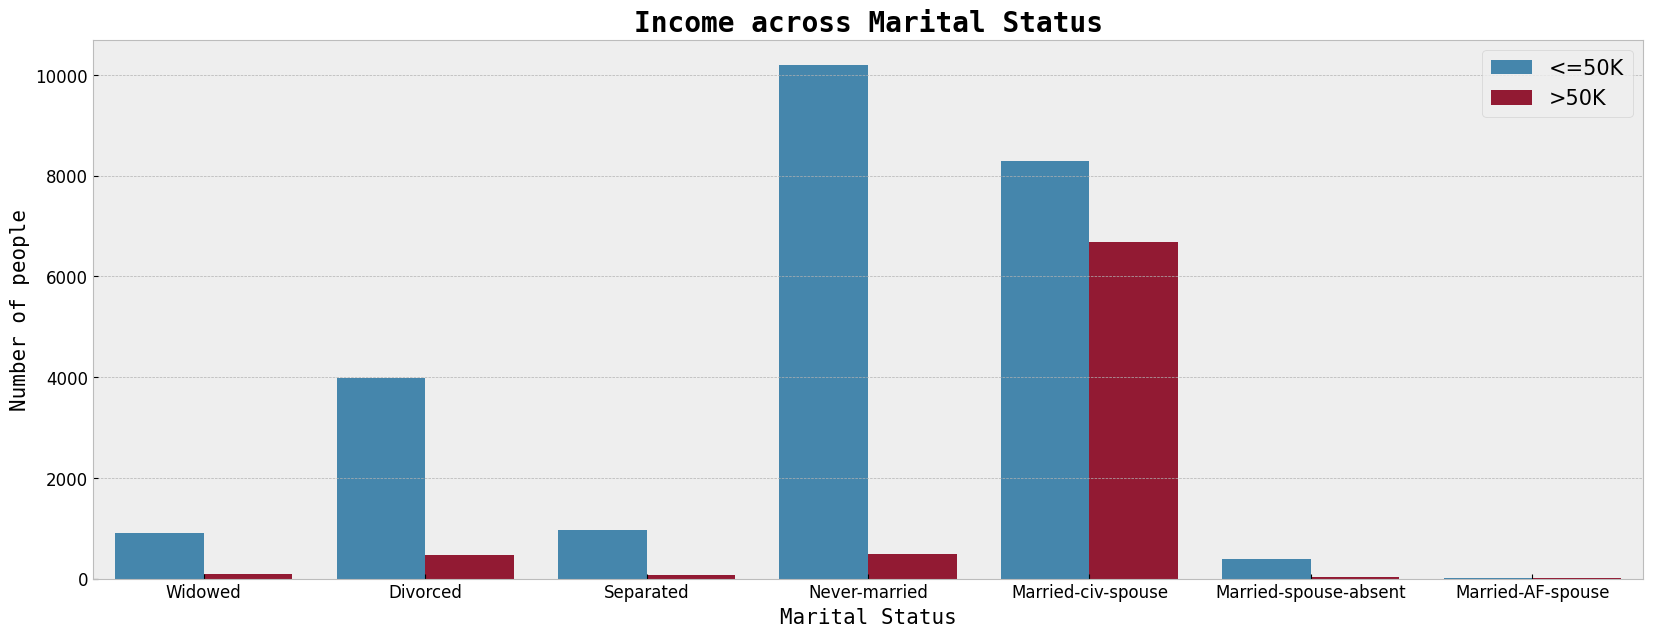

In [21]:
# Creating a countpLot of income across Marital Status
#plt.style.use('seaborn')
plt.figure(figsize=(20,7))
sns.countplot(dataset, x='marital.status',hue='income')
plt.title('Income across Marital Status',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Marital Status',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={'size':15})
plt.show()

Observation:
- The countplot of income across marital status shows the distribution of people with salary <=50k and >50k across their Marital status

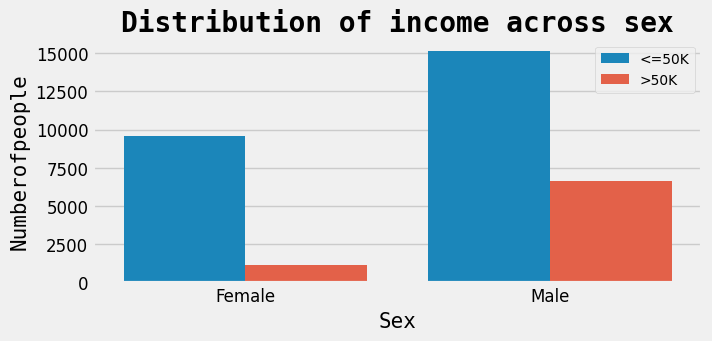

In [22]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,3))
sns.countplot(dataset, x='sex',hue='income')
plt.title('Distribution of income across sex',fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Sex',fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Numberofpeople',fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=12)
plt.legend(loc=1,prop={'size':10})
# plt.savefig('bi3.png')
plt.show()

Observation:
- The countplot of income across column sex shows that the Males are paid higher than females in both the categories

In [23]:
from sklearn. preprocessing import LabelEncoder
le = LabelEncoder() # Income is not missing any data
dataset['income'] = le.fit_transform(dataset['income'])
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [24]:
dataset['income'].unique()

array([0, 1])

Observations:
- In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
- From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

__5 - Prepare the dataset for modeling.__
- Replace '?'
- Label encode all the categorical columns
- Prepare independent variables X and dependent variable Y (Income).
- Perform feature scaling using StandardScaler and fix the imbalance in the dataset using any one of the techniques like SMOTE or RandomOverSampler
- Perform a train test split in the ratio 80:20 and random_state 42.

In [25]:
dataset = dataset.replace ('?',np.nan)
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [26]:
dataset.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


In [27]:
columns_with_nan=['workclass','occupation','native.country']
for col in columns_with_nan:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [28]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [29]:
dataset = dataset.replace ('?',np.nan)
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [30]:
# Label encode all the categorical columns
from sklearn.preprocessing import LabelEncoder

In [31]:
for col in dataset.columns:
    if dataset[col].dtypes=='object':
        encoder=LabelEncoder()
        dataset[col]=encoder.fit_transform(dataset[col])

In [32]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


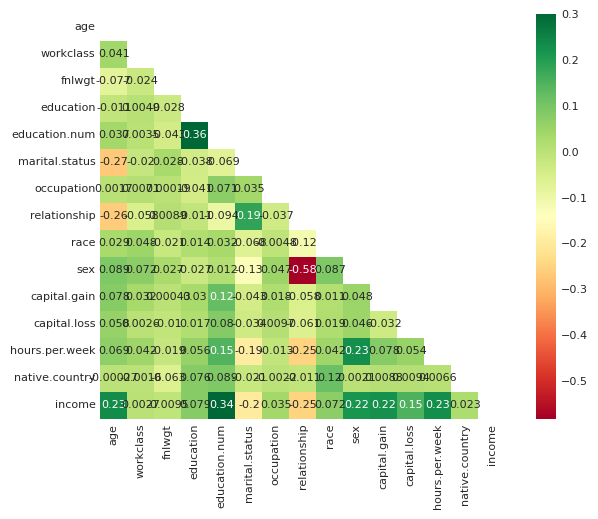

<Figure size 1500x800 with 0 Axes>

In [33]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Set fontsize as 8
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    heatmap = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                          annot=True, cmap='RdYlGn',
                          # Font size for correlation values
                          annot_kws={"size": 8})
    # Set colorbar font size
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    # Set axis label font size
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.figure(figsize=(15, 8))
plt.show()

In [34]:
# Prepare independent variables X and dependent variable Y (Income).
X = dataset.drop('income',axis=1)
Y = dataset['income']

In [35]:
# Perform feature scaling using StandardScaler and fix the imbalance in
# the dataset using any one of the techniques like SMOTE or RandomOverSampler
from sklearn.preprocessing import StandardScaler
for col in X. columns :
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(- 1,1))

In [36]:
X[:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


In [37]:
round(Y.value_counts(normalize=True)*100,2).astype('str')+' %'

income
0    75.92 %
1    24.08 %
Name: proportion, dtype: object

In [38]:
# RandomOverSampler duplicates undersample data
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
ros.fit(X,Y)

RandomOverSampler(random_state=42)

In [39]:
RandomOverSampler(random_state=42)
X_resampled,Y_resampled=ros.fit_resample(X,Y)
round(Y_resampled.value_counts(normalize=True)*100,2).astype('str')+'%'

income
0    50.0%
1    50.0%
Name: proportion, dtype: object

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2 , random_state=42 )

In [41]:
print ( "X_train shape:" , X_train. shape )
print ( "X_test shape : ", X_test. shape)
print ( "Y_train shape:" , Y_train. shape )
print ( "Y_test shape : ", Y_test. shape)

X_train shape: (39552, 14)
X_test shape :  (9888, 14)
Y_train shape: (39552,)
Y_test shape :  (9888,)


__6 - Perform Data Modeling__
- Train Logistic Regression Model, KNN Classifier Model, SVM Classifier, Naive Bayes Classifier, Decision Tree Classifier and Random Forest Classifier
- Perform model evaluation on Accuracy and F1 score and identify the best model.

In [42]:
ACC = []
F1 = []
model_names = []

In [43]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model_name = 'Logistic Regression'

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [44]:
model_names.append(model_name)

In [45]:
# Make predictions for the test set
yhat = log_reg.predict(X_test)

In [46]:
print(Y_test[:20].values,'Actual')
print(yhat[:20],'Predicted')

[0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1] Actual
[0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1] Predicted


Accuracy score: 0.7669902912621359
Precision score: 0.767337807606264
Recall score: 0.7648489762821812
F1 score: 0.7660913705583756


[Text(0, 0.5, 'YES'), Text(0, 1.5, 'NO')]

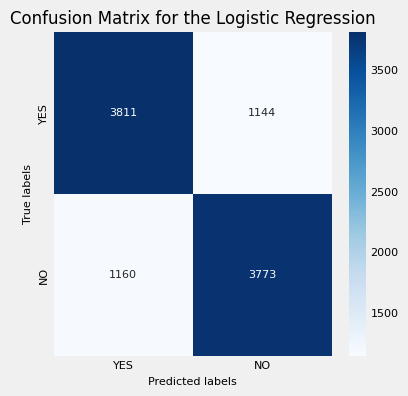

In [47]:
from sklearn import metrics
# Step 7 - Compute scores for the test set
accuracy = metrics.accuracy_score(Y_test, yhat)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, yhat)
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, yhat)
print("Recall score:",recall)
f1 = metrics.f1_score(Y_test, yhat)
print("F1 score:",f1)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, yhat)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
ax= plt.subplot()
# annot=True to annotate cells, ftm='g' to disable scientific notation
heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax,
            cmap="Blues", annot_kws={"size": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.set_xlabel('Predicted labels', fontsize=8)
ax.set_ylabel('True labels', fontsize=8)
ax.set_title('Confusion Matrix for the '+model_name, fontsize=12)
ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [48]:
# Accuracy for the train
metrics.accuracy_score(Y_train,log_reg.predict(X_train))

0.7704035194174758

In [49]:
ACC.append(accuracy)
F1.append(f1)

In [50]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [51]:
model_names.append(model_name)

In [52]:
# Make predictions for the test set
yhat = knn.predict(X_test)

print(Y_test[:20].values,'Actual')
print(yhat[:20],'Predicted')

[0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1] Actual
[0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1] Predicted


Accuracy score: 0.8358616504854369
Precision score: 0.7961703650680029
Recall score: 0.9018852625177377
F1 score: 0.8457370972341032


[Text(0, 0.5, 'YES'), Text(0, 1.5, 'NO')]

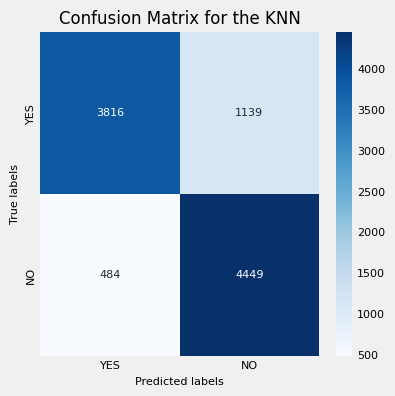

In [53]:
from sklearn import metrics
# Step 7 - Compute scores for the test set
accuracy = metrics.accuracy_score(Y_test, yhat)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, yhat)
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, yhat)
print("Recall score:",recall)
f1 = metrics.f1_score(Y_test, yhat)
print("F1 score:",f1)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, yhat)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
ax= plt.subplot()
heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues",
                      annot_kws={"size": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.set_xlabel('Predicted labels', fontsize=8)
ax.set_ylabel('True labels', fontsize=8)
ax.set_title('Confusion Matrix for the '+model_name, fontsize=12)
ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [54]:
ACC.append(accuracy)
F1.append(f1)

In [55]:
# Support Vector Machine
from sklearn.svm import SVC

model_name = 'Support Vector Machine'

svc_model = SVC(kernel='rbf')
svc_model.fit(X_train,Y_train)

SVC()

In [56]:
model_names.append(model_name)

In [57]:
# Make predictions for the test set
yhat = svc_model.predict(X_test)
print(Y_test[:20].values,'Actual')
print(yhat[:20],'Predicted')

[0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1] Actual
[0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1] Predicted


Accuracy score: 0.8262540453074434
Precision score: 0.7925386715195633
Recall score: 0.8828299209406041
F1 score: 0.8352512466436517


[Text(0, 0.5, 'YES'), Text(0, 1.5, 'NO')]

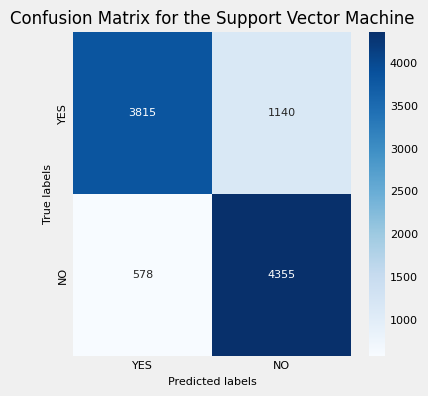

In [58]:
from sklearn import metrics
# Step 7 - Compute scores for the test set
accuracy = metrics.accuracy_score(Y_test, yhat)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, yhat)
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, yhat)
print("Recall score:",recall)
f1 = metrics.f1_score(Y_test, yhat)
print("F1 score:",f1)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, yhat)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
ax= plt.subplot()
heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues",
                      annot_kws={"size": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.set_xlabel('Predicted labels', fontsize=8)
ax.set_ylabel('True labels', fontsize=8)
ax.set_title('Confusion Matrix for the '+model_name, fontsize=12)
ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [59]:
ACC.append(accuracy)
F1.append(f1)

In [60]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

model_name = 'Naive Bayes Classifier'

nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)

GaussianNB()

In [61]:
model_names.append(model_name)

In [62]:
# Make predictions for the test set
yhat = nb_model.predict(X_test)
print(Y_test[:20].values,'Actual')
print(yhat[:20],'Predicted')

[0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1] Actual
[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0] Predicted


Accuracy score: 0.6894215210355987
Precision score: 0.8639562157935887
Recall score: 0.4480032434623961
F1 score: 0.5900413829929249


[Text(0, 0.5, 'YES'), Text(0, 1.5, 'NO')]

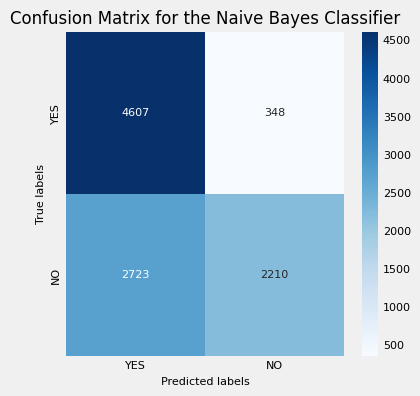

In [63]:
from sklearn import metrics
# Step 7 - Compute scores for the test set
accuracy = metrics.accuracy_score(Y_test, yhat)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, yhat)
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, yhat)
print("Recall score:",recall)
f1 = metrics.f1_score(Y_test, yhat)
print("F1 score:",f1)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, yhat)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
ax= plt.subplot()
heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues",
                      annot_kws={"size": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.set_xlabel('Predicted labels', fontsize=8)
ax.set_ylabel('True labels', fontsize=8)
ax.set_title('Confusion Matrix for the '+model_name, fontsize=12)
ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [64]:
ACC.append(accuracy)
F1.append(f1)

In [65]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_name = 'Decision Tree'

dec_tree = DecisionTreeClassifier(max_depth=7)
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7)

In [66]:
model_names.append(model_name)

In [67]:
# Make predictions for the test set
yhat = dec_tree.predict(X_test)
print(Y_test[:20].values,'Actual')
print(yhat[:20],'Predicted')

[0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1] Actual
[0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1] Predicted


Accuracy score: 0.8240291262135923
Precision score: 0.79981220657277
Recall score: 0.863369146563957
F1 score: 0.8303762916747904


[Text(0, 0.5, 'YES'), Text(0, 1.5, 'NO')]

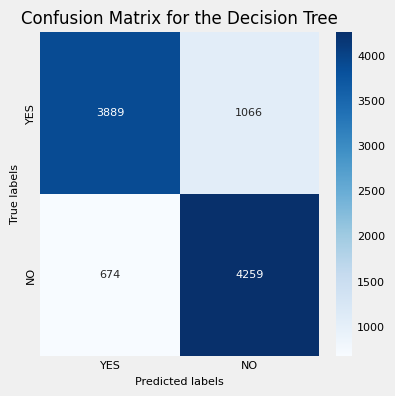

In [68]:
from sklearn import metrics
# Step 7 - Compute scores for the test set
accuracy = metrics.accuracy_score(Y_test, yhat)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, yhat)
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, yhat)
print("Recall score:",recall)
f1 = metrics.f1_score(Y_test, yhat)
print("F1 score:",f1)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, yhat)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
ax= plt.subplot()
heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues",
                      annot_kws={"size": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.set_xlabel('Predicted labels', fontsize=8)
ax.set_ylabel('True labels', fontsize=8)
ax.set_title('Confusion Matrix for the '+model_name, fontsize=12)
ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [69]:
ACC.append(accuracy)
F1.append(f1)

In [70]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_name = 'Random Forest'

ran_for = RandomForestClassifier(n_estimators=120,max_depth=7)
ran_for.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, n_estimators=120)

In [71]:
model_names.append(model_name)

In [72]:
# Make predictions for the test set
yhat = ran_for.predict(X_test)
print(Y_test[:20].values,'Actual')
print(yhat[:20],'Predicted')

[0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1] Actual
[0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1] Predicted


Accuracy score: 0.8267597087378641
Precision score: 0.7896725440806045
Recall score: 0.8897222785323332
F1 score: 0.8367171861595654


[Text(0, 0.5, 'YES'), Text(0, 1.5, 'NO')]

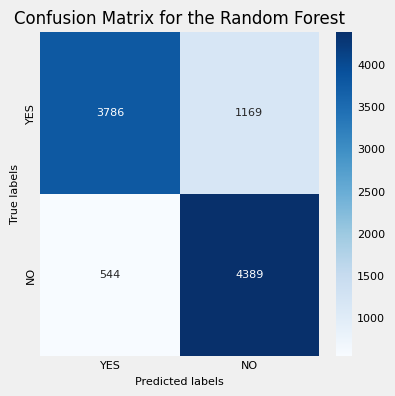

In [73]:
from sklearn import metrics
# Step 7 - Compute scores for the test set
accuracy = metrics.accuracy_score(Y_test, yhat)
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, yhat)
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, yhat)
print("Recall score:",recall)
f1 = metrics.f1_score(Y_test, yhat)
print("F1 score:",f1)

# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, yhat)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
ax= plt.subplot()
heatmap = sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues",
                      annot_kws={"size": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.set_xlabel('Predicted labels', fontsize=8)
ax.set_ylabel('True labels', fontsize=8)
ax.set_title('Confusion Matrix for the '+model_name, fontsize=12)
ax.xaxis.set_ticklabels(['YES', 'NO'], fontsize=8)
ax.yaxis.set_ticklabels(['YES', 'NO'], fontsize=8)

In [74]:
ACC.append(accuracy)
F1.append(f1)

In [75]:
model_name

'Random Forest'

In [76]:
acc_df = pd.DataFrame(columns = ['Accuracy'])
acc_df['Accuracy'] = ACC
acc_df['F1 score'] = F1
acc_df.index = model_names

In [77]:
acc_df

,Accuracy,F1 score
Logistic Regression,0.766990,0.766091
KNN,0.835862,0.845737
Support Vector Machine,0.826254,0.835251
Naive Bayes Classifier,0.689422,0.590041
Decision Tree,0.824029,0.830376
Random Forest,0.826760,0.836717


__Conclusion: the most accurate model is KNN with the best accuracy and the best F1 score.__